In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker

In [39]:
df = pd.read_csv('train.csv')

In [40]:
display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [41]:
display(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [42]:
df= df.drop(['Customer Name', 'Sub-Category'], axis=1)
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Product Name', 'Sales'],
      dtype='object')

In [43]:
print("Missing values before handling:")
display(df.isnull().sum())

Missing values before handling:


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Segment,0
Country,0
City,0
State,0


In [46]:
# Fill missing values in 'Postal Code' with the median
if 'Postal Code' in df.columns:
    median_postal_code = df['Postal Code'].median()
    df['Postal Code'].fillna(median_postal_code, inplace=True)

/tmp/ipython-input-3515589397.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(median_postal_code, inplace=True)


In [49]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Sales'] = pd.to_numeric(df['Sales'])
df['Postal Code'] = pd.to_numeric(df['Postal Code'])

display(df.dtypes)

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Segment,object
Country,object
City,object
State,object


In [51]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Month Name'] = df['Order Date'].dt.strftime('%B')
df['Order Day of Week'] = df['Order Date'].dt.day_name()
display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Product Name,Sales,Order Month,Order Year,Order Month Name,Order Day of Week
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,11,2017,November,Wednesday
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017,November,Wednesday
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017,June,Monday
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016,October,Tuesday
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,10,2016,October,Tuesday


In [58]:
df['Sales'] = df['Sales'].round(2)

In [59]:
monthly_sales = df.pivot_table(index=['Order Month', 'Order Month Name'], values='Sales', aggfunc='sum')
monthly_units_sold = df.pivot_table(index=['Order Month', 'Order Month Name'], values='Row ID', aggfunc='count')
display(monthly_sales)
display(monthly_units_sold)

,,Sales
Order Month,Order Month Name,
1,January,94291.66
2,February,59371.12
3,March,197573.57
4,April,136283.01
5,May,154086.73
6,June,145837.47
7,July,145535.66
8,August,157315.84
9,September,300103.36


,,Row ID
Order Month,Order Month Name,
1,January,366
2,February,297
3,March,680
4,April,657
5,May,725
6,June,691
7,July,697
8,August,693
9,September,1354


<Figure size 1200x600 with 0 Axes>

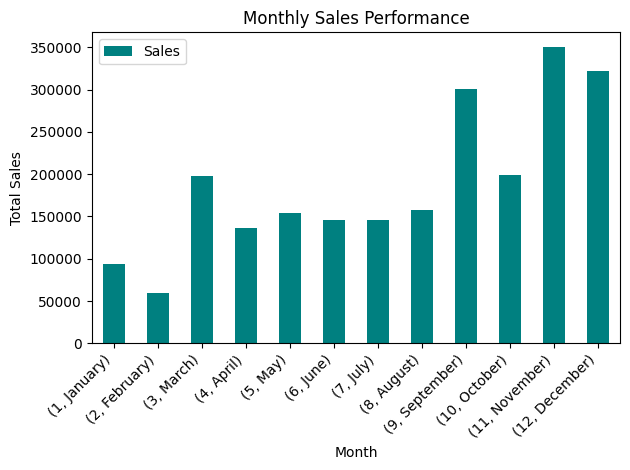

<Figure size 1200x600 with 0 Axes>

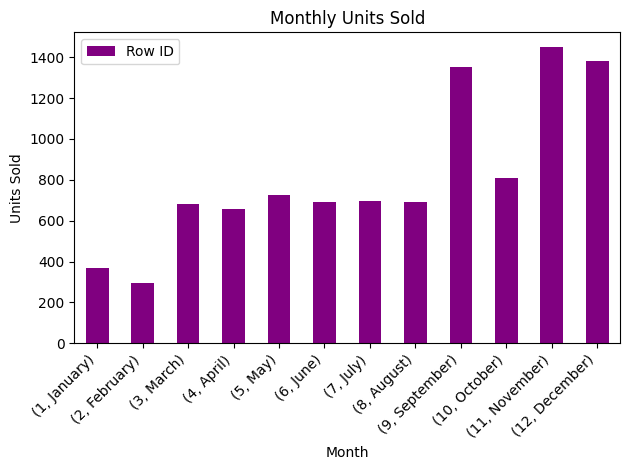

In [60]:
# Create a bar plot for monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', legend=True, color='teal')
plt.title('Monthly Sales Performance')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a bar plot for monthly units sold
plt.figure(figsize=(12, 6))
monthly_units_sold.plot(kind='bar', legend=True, color='purple')
plt.title('Monthly Units Sold')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [68]:
if 'Order Date' not in df.columns and 'Order Date' in df.index.names:
    df = df.reset_index()

df = df.set_index('Order Date')
df = df.sort_index()
display(df.head())

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Product Name,Sales,Order Month,Order Year,Order Month Name,Order Day of Week
Order Date,,,,,,,,,,,,,,,,,,,
2015-01-03,7981,CA-2015-103800,2015-01-07,Standard Class,DP-13000,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,1,2015,January,Saturday
2015-01-04,742,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,GBC Standard Plastic Binding Systems Combs,3.54,1,2015,January,Sunday
2015-01-04,741,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,SAFCO Boltless Steel Shelving,272.74,1,2015,January,Sunday
2015-01-04,740,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Avery 508,11.78,1,2015,January,Sunday
2015-01-05,1760,CA-2015-141817,2015-01-12,Standard Class,MB-18085,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,1,2015,January,Monday


In [69]:
region_sales = df.groupby('Region')['Sales'].resample('M').sum().reset_index()
category_sales = df.groupby('Category')['Sales'].resample('M').sum().reset_index()
display(region_sales.head())
display(category_sales.head())

/tmp/ipython-input-112305084.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region_sales = df.groupby('Region')['Sales'].resample('M').sum().reset_index()
/tmp/ipython-input-112305084.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  category_sales = df.groupby('Category')['Sales'].resample('M').sum().reset_index()


,Region,Order Date,Sales
0,Central,2015-01-31,1533.97
1,Central,2015-02-28,1233.18
2,Central,2015-03-31,5827.58
3,Central,2015-04-30,3712.35
4,Central,2015-05-31,4044.50


,Category,Order Date,Sales
0,Furniture,2015-01-31,6217.28
1,Furniture,2015-02-28,1839.66
2,Furniture,2015-03-31,14243.39
3,Furniture,2015-04-30,7944.83
4,Furniture,2015-05-31,6912.79


Some parts of the codes are commented out to avoid GitHub rendering error

In [74]:
import ipywidgets as widgets
from IPython.display import display

# Get unique values for slicers
regions = df['Region'].unique().tolist()
regions.insert(0, 'All Regions')

categories = df['Category'].unique().tolist()
categories.insert(0, 'All Categories')

# Create dropdown slicers (commented out to avoid GitHub rendering error)
# region_slicer = widgets.Dropdown(
#     options=regions,
#     description='Region:',
#     disabled=False,
# )

# category_slicer = widgets.Dropdown(
#     options=categories,
#     description='Category:',
#     disabled=False,
# )

# Display slicers (commented out to avoid GitHub rendering error)
# display(region_slicer)
# display(category_slicer)

def update_plots(region, category):
    filtered_df = df.copy()

    if region != 'All Regions':
        filtered_df = filtered_df[filtered_df['Region'] == region]

    if category != 'All Categories':
        filtered_df = filtered_df[filtered_df['Category'] == category]

    monthly_sales_filtered = filtered_df['Sales'].resample('M').sum()
    monthly_units_sold_filtered = filtered_df['Row ID'].resample('M').count()

    monthly_sales_mom_filtered = monthly_sales_filtered.pct_change()
    monthly_units_sold_mom_filtered = monthly_units_sold_filtered.pct_change()

    plt.clf() # Clear the previous plots
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    # Plot Monthly Sales and MoM Sales Change
    axes[0].plot(monthly_sales_filtered.index, monthly_sales_filtered, label='Monthly Sales', color='teal')
    axes[0].set_ylabel('Total Sales')
    axes[0].set_title(f'Monthly Sales and MoM Change - Region: {region}, Category: {category}')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].legend(loc='upper left')

    ax2 = axes[0].twinx()
    ax2.plot(monthly_sales_mom_filtered.index, monthly_sales_mom_filtered, label='MoM Sales Change', color='orange', linestyle='--')
    ax2.set_ylabel('MoM Change')
    ax2.legend(loc='upper right')
    ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

    # Plot Monthly Units Sold and MoM Units Sold Change
    axes[1].plot(monthly_units_sold_filtered.index, monthly_units_sold_filtered, label='Monthly Units Sold', color='purple')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Units Sold')
    axes[1].set_title(f'Monthly Units Sold and MoM Change - Region: {region}, Category: {category}')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend(loc='upper left')

    ax3 = axes[1].twinx()
    ax3.plot(monthly_units_sold_mom_filtered.index, monthly_units_sold_mom_filtered, label='MoM Units Sold Change', color='red', linestyle='--')
    ax3.set_ylabel('MoM Change')
    ax3.legend(loc='upper right')
    ax3.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))


    plt.tight_layout()
    plt.show()

# Create interactive plot
# interactive_plot = widgets.interactive(update_plots, region=region_slicer, category=category_slicer)
# display(interactive_plot)